In [121]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
# winner state: 0011

In [122]:
main = QuantumCircuit(4)
oracle = QuantumCircuit(4, name='oracle')
reflection = QuantumCircuit(4, name='reflection')

In [123]:
# oracle operation
oracle.h([0,1,2,3])
oracle.z([2,3])
oracle.to_gate()

oracle.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤┌───┐
q_2: ┤ H ├┤ Z ├
     ├───┤├───┤
q_3: ┤ H ├┤ Z ├
     └───┘└───┘

In [124]:
# reflection
reflection.h([0,1,2,3])
reflection.z(2)
reflection.cz(0,2)
reflection.z(3)
reflection.cz(1,3)
reflection.to_gate()

reflection.draw()

┌───┐           
q_0: ┤ H ├──────■────
     ├───┤      │    
q_1: ┤ H ├──────┼──■─
     ├───┤┌───┐ │  │ 
q_2: ┤ H ├┤ Z ├─■──┼─
     ├───┤├───┤    │ 
q_3: ┤ H ├┤ Z ├────■─
     └───┘└───┘

In [125]:
main.h([0,1,2,3])
main.append(oracle, [0,1,2,3])
main.append(reflection, [0,1,2,3])
main.measure_all()

main.draw()

┌───┐┌─────────┐┌─────────────┐ ░ ┌─┐         
   q_0: ┤ H ├┤0        ├┤0            ├─░─┤M├─────────
        ├───┤│         ││             │ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1        ├┤1            ├─░──╫─┤M├──────
        ├───┤│  oracle ││  reflection │ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2        ├┤2            ├─░──╫──╫─┤M├───
        ├───┤│         ││             │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3        ├┤3            ├─░──╫──╫──╫─┤M├
        └───┘└─────────┘└─────────────┘ ░  ║  ║  ║ └╥┘
meas_0: ═══════════════════════════════════╩══╬══╬══╬═
                                              ║  ║  ║ 
meas_1: ══════════════════════════════════════╩══╬══╬═
                                                 ║  ║ 
meas_2: ═════════════════════════════════════════╩══╬═
                                                    ║ 
meas_3: ════════════════════════════════════════════╩═

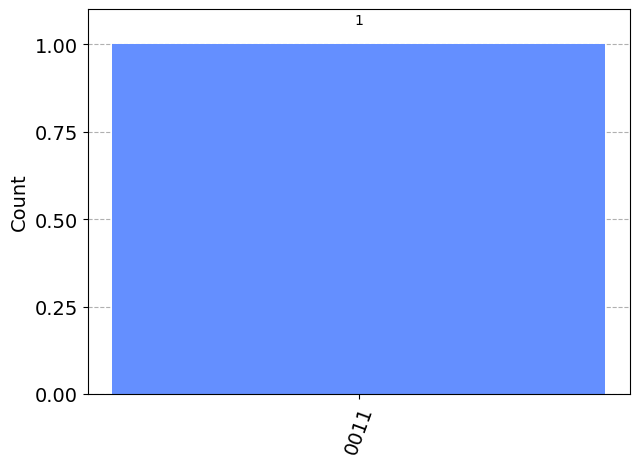

In [126]:
simu = Aer.get_backend('statevector_simulator')
result = execute(main, backend=simu).result()
plot_histogram(result.get_counts(main))

In [127]:
counts = result.get_counts(main)
print(counts)

{'0011': 1}
